# # 6_1_Tuning parameters of RF

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import accuracy_score, classification_report

In [11]:
#load the files

X_train = pd.read_csv('../data/x_y_data/SMOTE/X_resampled.csv')
y_train = pd.read_csv('../data/x_y_data/SMOTE/y_resampled.csv')
X_test = pd.read_csv('../data/x_y_data/SMOTE/X_test.csv')
y_test = pd.read_csv('../data/x_y_data/SMOTE/y_test.csv')
data = pd.read_csv('../data/cleaned_data/cleaned_data.csv')

In [12]:
y_train.loc[y_train['churn'] == 'Yes', 'churn'] = 1
y_train.loc[y_train['churn'] == 'No', 'churn'] = 0
y_train['churn'].value_counts()

churn
1    4130
0    4130
Name: count, dtype: int64

In [17]:
y_train['churn'] =y_train['churn'].astype('int64')
y_train['churn'].dtypes

dtype('int64')

In [13]:
y_test.loc[y_test['churn'] == 'Yes', 'churn'] = 1
y_test.loc[y_test['churn'] == 'No', 'churn'] = 0
y_test['churn'].value_counts()

churn
0    1033
1     374
Name: count, dtype: int64

In [18]:
y_test['churn'] =y_test['churn'].astype('int64')
y_test['churn'].dtypes

dtype('int64')

In [19]:
#set the high-parameter
import warnings
from tqdm.auto import tqdm

# Disable warnings
warnings.filterwarnings("ignore")

param_grid = {
    'n_estimators': [75, 100, 125],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [5, 10],
    'max_features': ['sqrt']  # round(sqrt(#cols))
}

rf = RandomForestClassifier(random_state=12345)

kappa_scorer = make_scorer(cohen_kappa_score)

# Disable tqdm progress bar and set mininterval to suppress messages
with tqdm(total=600, mininterval=1e-9) as pbar:
    grid_search = GridSearchCV(rf, param_grid, cv=5, return_train_score=True,
                               n_jobs=-1, verbose=20, scoring=kappa_scorer)
    grid_search.fit(X_train, y_train)
    pbar.update()  # Make sure progress bar completes

# Enable warnings again
warnings.filterwarnings("default")

grid_search.best_params_  # To check the best set of parameters returned


  0%|          | 0/600 [00:00<?, ?it/s]

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 1/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 4/5; 1/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5; 3/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 3/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5; 15/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=125
[CV 4/5; 15/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=125;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5; 16/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=2, 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 1/5; 40/108] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=75
[CV 1/5; 40/108] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5; 42/108] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=125
[CV 2/5; 42/108] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=125;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5; 42/108] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=125
[CV 3/5; 42/108] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=125;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5; 43/108] START criterion=gini, max_depth=10, max_features=sqrt, min_sampl

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 5/5; 1/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 5/5; 1/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5; 2/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 2/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5; 3/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 3/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5; 4/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 1/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 1/5; 1/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5; 6/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=125
[CV 3/5; 6/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=125;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5; 7/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75
[CV 1/5; 7/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5; 7/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_s

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 2/5; 1/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 2/5; 1/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5; 3/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 3/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5; 5/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100
[CV 1/5; 5/108] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5; 5/108] START criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 49/108] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75
[CV 1/5; 49/108] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5; 49/108] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75
[CV 2/5; 49/108] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5; 50/108] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100
[CV 2/5; 50/108] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5; 50/108] START criterion=gini, max_depth=10, max_features=sqrt, min_samples

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 1/5; 83/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5; 83/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 83/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5; 84/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 2/5; 84/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5; 84/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 3/5; 84/108] END criterion=entropy, max_depth=10, max_fea

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 82/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5; 82/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75
[CV 5/5; 82/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5; 83/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 83/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5; 84/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=125
[CV 1/5; 84/108] END criterion=entropy, max_depth=10, max_featur

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV 3/5; 88/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5; 89/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 3/5; 89/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5; 89/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100
[CV 4/5; 89/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5; 90/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=125
[CV 4/5; 90/108] END criterion=entropy, max_depth=10, max_feat

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

[CV 4/5; 97/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=75;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5; 98/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 4/5; 98/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5; 98/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100
[CV 5/5; 98/108] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5; 99/108] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=125
[CV 5/5; 99/108] END criterion=entropy, max_depth=10, max_feat

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

[CV 3/5; 62/108] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=(train=0.586, test=0.574) total time=   1.9s
[CV 2/5; 64/108] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75
[CV 2/5; 64/108] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=75;, score=(train=0.584, test=0.551) total time=   1.4s
[CV 1/5; 65/108] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100
[CV 1/5; 65/108] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=(train=0.624, test=0.540) total time=   2.0s
[CV 4/5; 66/108] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=125
[CV 4/5; 66/108] END criterion=entropy, max_depth=5, max_

##### The parameter {'criterion': 'gini','max_depth': 10, 'max_features': 'sqrt','min_samples_leaf': 1, 'min_samples_split': 2,'n_estimators': 75} was chosen. 

####  Cross validation socre - Kappa-

In [20]:
rf1= RandomForestClassifier(criterion= 'gini',
 max_depth= 10,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 75)

results = []
kfold = KFold(n_splits=10, shuffle=False)
cv_results = cross_val_score(rf1, X_train, y_train, cv=kfold, scoring=kappa_scorer)

results.append(cv_results)
    
msg = f" RF: {cv_results.mean()} ({cv_results.std()})"
print(msg)

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Use

 RF: 0.3651125230787691 (0.24735472028529065)


### Variable Importance 

/Users/soichirotanabe/Desktop/IRONHACK/Week_9/Final_project/final_project_env/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


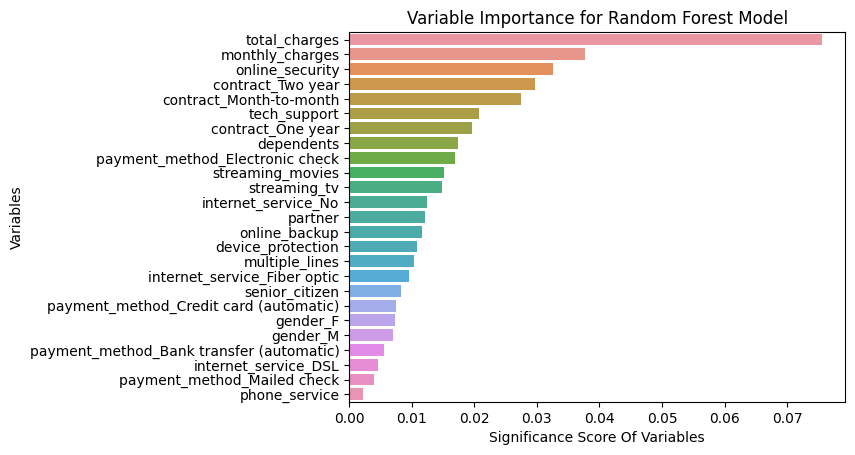

In [22]:
X_train2 = X_train.copy()  
y_train2 = y_train.copy()



rf_tuned = rf1.fit(X_train2, y_train2)

from sklearn.inspection import permutation_importance


# Calculate permutation feature importances
result = permutation_importance(rf_tuned, X_train2, y_train2, n_repeats=10, random_state=42)

# Sort and display the results
feature_importances = pd.Series(result.importances_mean, index=X_train2.columns).sort_values(ascending=False)

# Plot the feature importances
import matplotlib.pyplot as plt

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Importance for Random Forest Model")
plt.show()


In [24]:
feature_importances_df = pd.DataFrame(feature_importances)
feature_importances_df.head()

,0
total_charges,0.075484
monthly_charges,0.037760
online_security,0.032651
contract_Two year,0.029746
contract_Month-to-month,0.027518


In [25]:
feature_importances_df = feature_importances_df.rename(columns={0:'Significance Score'})
feature_importances_df.head(2)

,Significance Score
total_charges,0.075484
monthly_charges,0.037760


In [27]:
feature_importances_df.to_csv('../data/Significant_Score/SMOTE_RF_Significance_Score.csv', index=False)

### the classification report

In [28]:
from sklearn.metrics import confusion_matrix


y_pred = rf1.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
display(cm)

Confusion Matrix:


array([[793, 240],
       [108, 266]])

In [29]:
y_pred_df = pd.DataFrame(y_pred)

y_pred_df.value_counts()

0    901
1    506
Name: count, dtype: int64

In [30]:
y_test_df = pd.DataFrame(y_test)

y_test_df.value_counts()

churn
0        1033
1         374
Name: count, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


y_pred = rf1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)

# Create a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "Kappa"],
    "Score": [accuracy, precision, recall, f1, kappa]
})

display(metrics_df)

,Metric,Score
0,Accuracy,0.752665
1,Precision,0.525692
2,Recall,0.711230
3,F1-Score,0.604545
4,Kappa,0.430439


In [32]:
metrics_df.to_csv('../data/metrics/SMOTE_rf_metrics.csv', index=False)